# Sentiment Trends

### 정원(20214772)

In [64]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [65]:
query = {
  "size":0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
        },
        "aggs": {
          "group_by_sentiment":{
            "terms": {
              "field": "sentiment.keyword"
          }
        }
      }
    }
  }
}

In [66]:
query = json.dumps(query)

In [67]:
headers = {
    'Content-Type': 'application/json'
}

In [68]:
resp = requests.get(
    f'{ELASTICSEARCH_URL}/news/_search',
    headers=headers,
    data = query,
    auth = ELASTICSEARCH_AUTH    
)

In [69]:
resp.status_code

200

In [70]:
results = resp.json()

In [71]:
buckets = results['aggregations']['group_by_date']['buckets']

In [72]:
buckets

[{'key_as_string': '2022-08-01T00:00:00.000Z',
  'key': 1659312000000,
  'doc_count': 5398,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'neutral', 'doc_count': 733},
    {'key': 'positive', 'doc_count': 299},
    {'key': 'negative', 'doc_count': 98}]}},
 {'key_as_string': '2022-08-02T00:00:00.000Z',
  'key': 1659398400000,
  'doc_count': 4958,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'neutral', 'doc_count': 616},
    {'key': 'positive', 'doc_count': 245},
    {'key': 'negative', 'doc_count': 103}]}},
 {'key_as_string': '2022-08-03T00:00:00.000Z',
  'key': 1659484800000,
  'doc_count': 5022,
  'group_by_sentiment': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'neutral', 'doc_count': 653},
    {'key': 'positive', 'doc_count': 255},
    {'key': 'negative', 'doc_count': 92}]}},
 {'key_as_string': '2022-08-04T00:00

In [73]:
buffer = []

for x in buckets:
    sents = x['group_by_sentiment']['buckets']
    if len(sents) == 0:
        continue

    entry = { t['key']: t['doc_count'] for t in sents}
    entry['date'] = x['key_as_string']

    buffer.append(entry)


In [74]:
df_sentiments = pd.DataFrame(buffer)
df_sentiments['date'] = pd.to_datetime(df_sentiments['date'])
df_sentiments = df_sentiments.set_index('date')

In [75]:
df_sentiments.head()

,neutral,positive,negative
date,,,
2022-08-01 00:00:00+00:00,733,299,98
2022-08-02 00:00:00+00:00,616,245,103
2022-08-03 00:00:00+00:00,653,255,92
2022-08-04 00:00:00+00:00,663,250,83
2022-08-05 00:00:00+00:00,913,348,166


In [76]:
plt.rcParams['figure.figsize'] = (10, 4)

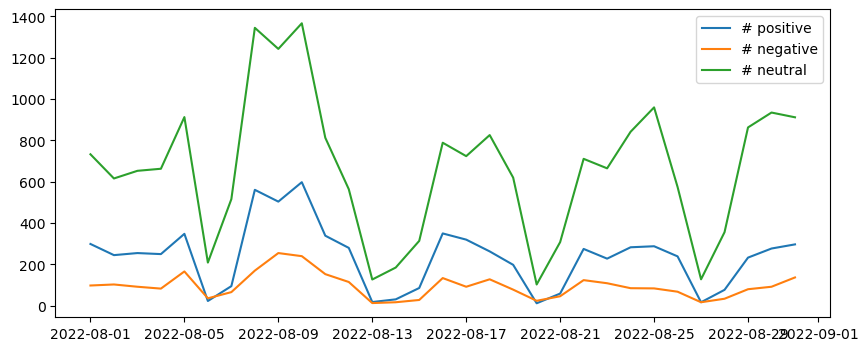

In [77]:
plt.plot(df_sentiments['positive'], label='# positive')
plt.plot(df_sentiments['negative'], label='# negative')
plt.plot(df_sentiments['neutral'], label='# neutral')
plt.legend()
plt.show()

In [78]:
df_sentiments['sentiment'] \
    = (df_sentiments['positive'] - df_sentiments['negative'])\
    / df_sentiments.sum(axis=1)

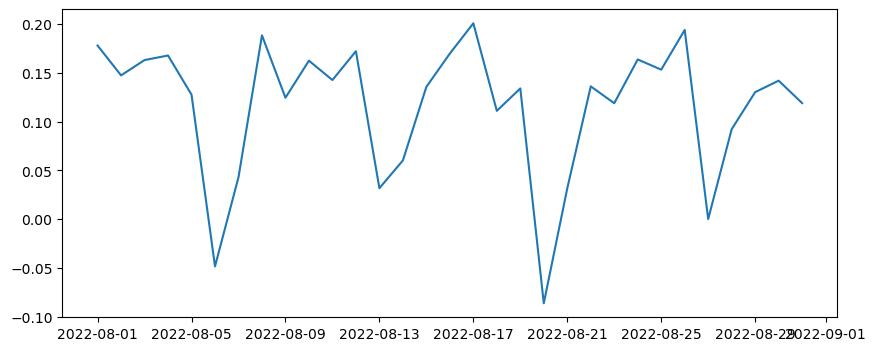

In [79]:
plt.plot(df_sentiments['sentiment'])
plt.show()